## Perceptrón simple
Entrenar un modelo de red neuronal que aprenda la compuerta AND
<table>
    <tr>
        <td>P</td><td>Q</td><td>P AND Q</td>
    </tr>
    <tr>
        <td>1</td><td>1</td><td>1</td>
    </tr>
    <tr>
        <td>1</td><td>0</td><td>0</td>
    </tr>
    <tr>
        <td>0</td><td>1</td><td>0</td>
    </tr>
    <tr>
        <td>0</td><td>0</td><td>0</td>
    </tr>
</table>

### Librerías

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### Cargar los datos de entrenamiento

In [4]:
X = torch.tensor([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=torch.float32)

y = torch.tensor([[0],
                  [0],
                  [0],
                  [1]], dtype=torch.float32)

### Definir y configurar el modelo
1. <strong>nn.Module</strong> : Es la base de todos los modelos
2. <strong>nn.Linear</strong> : Es una capa de la red neuronal
3. <strong>nn.Sigmoid</strong> : Aplica la función sigmoide
4. <strong>forward</strong> :  Define cómo fluye la información por el modelo (Aplica la capa lineal y luego la función de activación)
5. <strong>model</strong> : Es una instancia del modelo (está lista para entrenarse)
6. <strong>nn.BCELoss</strong> : Como es un problema de clasificación binaria (una sola salida) y la función de activación es sigmoide (ideal para representar probabilidades), se usa esta función para comparar la salida del modelo (probabilidad) con la etiqueta real y calcula cuánto se equivocó el modelo.
7. <strong>optim.SGD</strong> : Ajusta los pesos del modelo para minimizar la pérdida.

In [6]:
class ANDGateModel(nn.Module):
    def __init__(self):
        super(ANDGateModel, self).__init__()
        self.linear = nn.Linear(2, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        return self.activation(self.linear(x))

model = ANDGateModel()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

### Entrenar el modelo
* <strong>zero_grad()</strong> : limpia los gradientes acumulados.
* <strong>loss.backward()</strong> : calcula los gradientes de la pérdida con respecto a los pesos.
* <strong>step()</strong> : actualiza los pesos del modelo usando el optimizador (SGD en este caso).

In [7]:
losses = []
accuracies = []

for epoch in range(1000):
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    predicted = outputs.round()
    correct = (predicted == y).sum().item()
    accuracy = correct / y.size(0)

    losses.append(loss.item())
    accuracies.append(accuracy)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/1000] - Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}")

Epoch [100/1000] - Loss: 0.4746, Accuracy: 0.75
Epoch [200/1000] - Loss: 0.3702, Accuracy: 1.00
Epoch [300/1000] - Loss: 0.3063, Accuracy: 1.00
Epoch [400/1000] - Loss: 0.2627, Accuracy: 1.00
Epoch [500/1000] - Loss: 0.2307, Accuracy: 1.00
Epoch [600/1000] - Loss: 0.2059, Accuracy: 1.00
Epoch [700/1000] - Loss: 0.1860, Accuracy: 1.00
Epoch [800/1000] - Loss: 0.1697, Accuracy: 1.00
Epoch [900/1000] - Loss: 0.1560, Accuracy: 1.00
Epoch [1000/1000] - Loss: 0.1444, Accuracy: 1.00


### Visualizar el proceso de aprendizaje

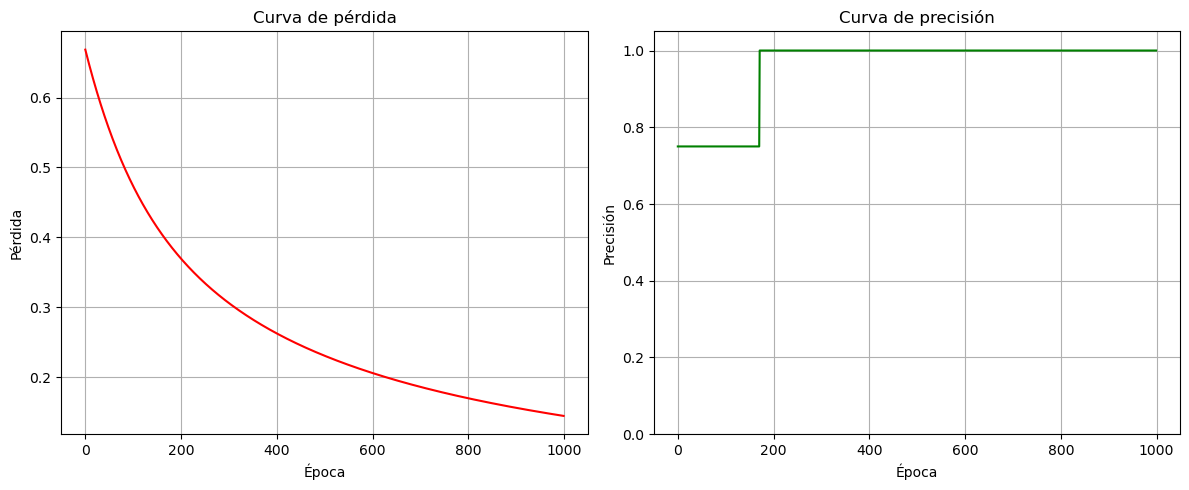

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label="Pérdida", color='red')
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Curva de pérdida")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracies, label="Precisión", color='green')
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.title("Curva de precisión")
plt.ylim(0, 1.05)
plt.grid(True)

plt.tight_layout()
plt.show()